

<h1><center><font color=crimson> 
    <br> CSAI 325 - Introduction to Data Science 
<center><font color=crimson>     
    <br> Final Project - Online Grocery Recommendation System

 
    
   

### <b><font color=steelblue>  Team Members:  Mai Waheed 202200556 || Lujain Ahmad 202201738 || Farida Mohamed 202202579

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
aisle = pd.read_csv('aisles.csv')
department = pd.read_csv('departments.csv')
oP_Prior = pd.read_csv('order_products__prior.csv')
oP_Train = pd.read_csv('order_products__train.csv')
order = pd.read_csv('orders.csv')
product = pd.read_csv('products.csv')

## Exploratory Data Analysis

In [3]:
aisle.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
oP_Prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
oP_Train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
product.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
print("Aisles:",aisle.shape)
print("Departments:",department.shape)
print("order_products__prior:",oP_Prior.shape)
print("order_products__train:",oP_Train.shape)
print("Orders:",order.shape)
print("Products:",product.shape)

Aisles: (134, 2)
Departments: (21, 2)
order_products__prior: (32434489, 4)
order_products__train: (1384617, 4)
Orders: (3421083, 7)
Products: (49688, 4)


In [10]:
aisle.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [11]:
department.isna().sum()

department_id    0
department       0
dtype: int64

In [12]:
oP_Prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [13]:
oP_Train.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [14]:
order.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [15]:
product.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [16]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [17]:
order['days_since_prior_order'] = order['days_since_prior_order'].fillna(order['days_since_prior_order'].mean())

In [18]:
order.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [19]:
aisle.duplicated().sum()

0

In [20]:
department.duplicated().sum()

0

In [21]:
oP_Prior.duplicated().sum()

0

In [22]:
oP_Train.duplicated().sum()

0

In [23]:
order.duplicated().sum()

0

In [24]:
product.duplicated().sum()

0

In [25]:
# Get all categorical columns
categorical_columns = aisle.select_dtypes(include='object')

non_categorical_columns = aisle.select_dtypes(exclude='object')

num_categorical_columns = len(categorical_columns.columns)

num_non_categorical_columns = len(non_categorical_columns.columns)

print("Total Categorical Columns:", num_categorical_columns)
print("Categorical Columns:", categorical_columns.columns.tolist())

print("\nTotal Non-Categorical Columns:", num_non_categorical_columns)
print("Non-Categorical Columns:", non_categorical_columns.columns.tolist())

Total Categorical Columns: 1
Categorical Columns: ['aisle']

Total Non-Categorical Columns: 1
Non-Categorical Columns: ['aisle_id']


In [26]:
# Get all categorical columns
categorical_columns = department.select_dtypes(include='object')

non_categorical_columns = department.select_dtypes(exclude='object')

num_categorical_columns = len(categorical_columns.columns)

num_non_categorical_columns = len(non_categorical_columns.columns)

print("Total Categorical Columns:", num_categorical_columns)
print("Categorical Columns:", categorical_columns.columns.tolist())

print("\nTotal Non-Categorical Columns:", num_non_categorical_columns)
print("Non-Categorical Columns:", non_categorical_columns.columns.tolist())

Total Categorical Columns: 1
Categorical Columns: ['department']

Total Non-Categorical Columns: 1
Non-Categorical Columns: ['department_id']


In [27]:
# Get all categorical columns
categorical_columns = oP_Prior.select_dtypes(include='object')

non_categorical_columns = oP_Prior.select_dtypes(exclude='object')

num_categorical_columns = len(categorical_columns.columns)

num_non_categorical_columns = len(non_categorical_columns.columns)

print("Total Categorical Columns:", num_categorical_columns)
print("Categorical Columns:", categorical_columns.columns.tolist())

print("\nTotal Non-Categorical Columns:", num_non_categorical_columns)
print("Non-Categorical Columns:", non_categorical_columns.columns.tolist())

Total Categorical Columns: 0
Categorical Columns: []

Total Non-Categorical Columns: 4
Non-Categorical Columns: ['order_id', 'product_id', 'add_to_cart_order', 'reordered']


In [28]:
# Get all categorical columns
categorical_columns = oP_Train.select_dtypes(include='object')

non_categorical_columns = oP_Train.select_dtypes(exclude='object')

num_categorical_columns = len(categorical_columns.columns)

num_non_categorical_columns = len(non_categorical_columns.columns)

print("Total Categorical Columns:", num_categorical_columns)
print("Categorical Columns:", categorical_columns.columns.tolist())

print("\nTotal Non-Categorical Columns:", num_non_categorical_columns)
print("Non-Categorical Columns:", non_categorical_columns.columns.tolist())

Total Categorical Columns: 0
Categorical Columns: []

Total Non-Categorical Columns: 4
Non-Categorical Columns: ['order_id', 'product_id', 'add_to_cart_order', 'reordered']


In [29]:
# Get all categorical columns
categorical_columns = order.select_dtypes(include='object')

non_categorical_columns = order.select_dtypes(exclude='object')

num_categorical_columns = len(categorical_columns.columns)

num_non_categorical_columns = len(non_categorical_columns.columns)

print("Total Categorical Columns:", num_categorical_columns)
print("Categorical Columns:", categorical_columns.columns.tolist())

print("\nTotal Non-Categorical Columns:", num_non_categorical_columns)
print("Non-Categorical Columns:", non_categorical_columns.columns.tolist())

Total Categorical Columns: 1
Categorical Columns: ['eval_set']

Total Non-Categorical Columns: 6
Non-Categorical Columns: ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']


In [30]:
# Get all categorical columns
categorical_columns = product.select_dtypes(include='object')

non_categorical_columns = product.select_dtypes(exclude='object')

num_categorical_columns = len(categorical_columns.columns)

num_non_categorical_columns = len(non_categorical_columns.columns)

print("Total Categorical Columns:", num_categorical_columns)
print("Categorical Columns:", categorical_columns.columns.tolist())

print("\nTotal Non-Categorical Columns:", num_non_categorical_columns)
print("Non-Categorical Columns:", non_categorical_columns.columns.tolist())

Total Categorical Columns: 1
Categorical Columns: ['product_name']

Total Non-Categorical Columns: 3
Non-Categorical Columns: ['product_id', 'aisle_id', 'department_id']


In [31]:
order_products1 = oP_Prior.append(oP_Train)
order_products1.shape

C:\Users\Mai Waheed\AppData\Local\Temp\ipykernel_5140\235831595.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  order_products1 = oP_Prior.append(oP_Train)


(33819106, 4)

In [32]:
mergedDataF= order_products1.merge(product, on='product_id')
mergedDataF= mergedDataF.merge(aisle, on='aisle_id')
mergedDataF = mergedDataF.merge(department, on='department_id')
mergedDataF = mergedDataF.merge(order, on='order_id')

In [33]:
mergedDataF['user_total_orders'] = mergedDataF.groupby('user_id')['order_number'].transform('max')
mergedDataF['user_total_products'] = mergedDataF.groupby('user_id')['product_id'].transform('count')
mergedDataF['user_reorder_ratio'] = mergedDataF.groupby('user_id')['reordered'].transform('mean')
mergedDataF['product_total_orders'] = mergedDataF.groupby('product_id')['order_id'].transform('count')
mergedDataF['product_reorder_ratio'] = mergedDataF.groupby('product_id')['reordered'].transform('mean')

In [34]:
mergedDataF.shape

(33819106, 20)

In [35]:
mergedDataF.duplicated().sum()

0

In [36]:
mergedDataF.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_total_orders,user_total_products,user_reorder_ratio,product_total_orders,product_reorder_ratio
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0,9,100,0.5,20234,0.710240
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,9,100,0.5,70076,0.696173
2,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,9,100,0.5,75233,0.640876
3,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0,9,100,0.5,158,0.246835
4,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0,9,100,0.5,6569,0.158624


In [37]:
mergedDataF.tail()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_total_orders,user_total_products,user_reorder_ratio,product_total_orders,product_reorder_ratio
33819101,1015358,46477,1,0,100% Pure Peppermint Oil,6,2,other,other,27208,prior,44,3,9,1.0,100,903,0.683278,9,0.111111
33819102,647259,36631,1,0,Soothing Relief Diaper Rash Cream,6,2,other,other,17880,prior,23,2,17,2.0,47,194,0.541237,5,0.000000
33819103,2010951,16161,1,0,SystemSupport Liver Cleanse Capsules,6,2,other,other,62266,prior,8,3,15,4.0,12,259,0.656371,6,0.166667
33819104,2684414,1013,1,0,Poly-Vi-Sol® Infants And Toddlers Multivitamin...,6,2,other,other,69235,prior,3,1,22,30.0,5,28,0.035714,20,0.300000
33819105,3326955,46404,1,0,Cotes De Provence Rose,6,2,other,other,132609,prior,7,3,15,2.0,54,95,0.652632,4,0.250000


### Total Orders and Reorders From Most Popular Aisles

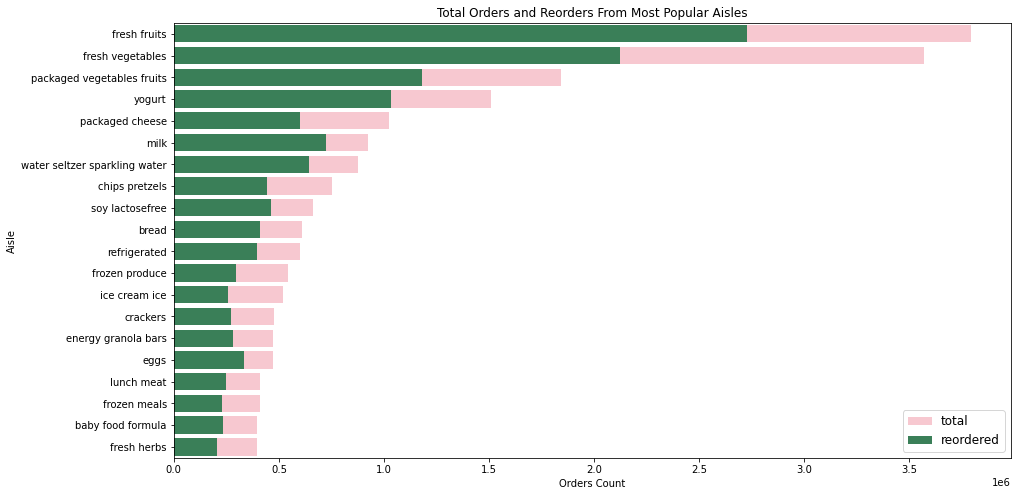

In [38]:
temp_df = mergedDataF.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.total[0:20], color='pink', label = "total")
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorders[0:20], color='seagreen', label = "reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

### Total Orders and Reorders From Most Popular Departments

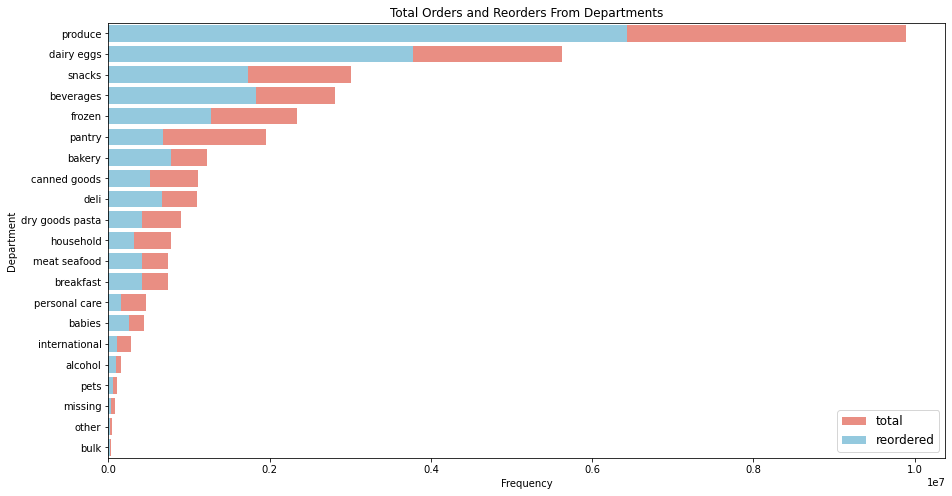

In [39]:
temp_df = mergedDataF.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(y = temp_df.department, x = temp_df["total"], color='salmon', label = "total")
ax = sns.barplot(y = temp_df.department, x = temp_df["reorders"], color='skyblue', label = "reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc = 4, prop={'size': 12})
ax.set_title("Total Orders and Reorders From Departments")
plt.show()

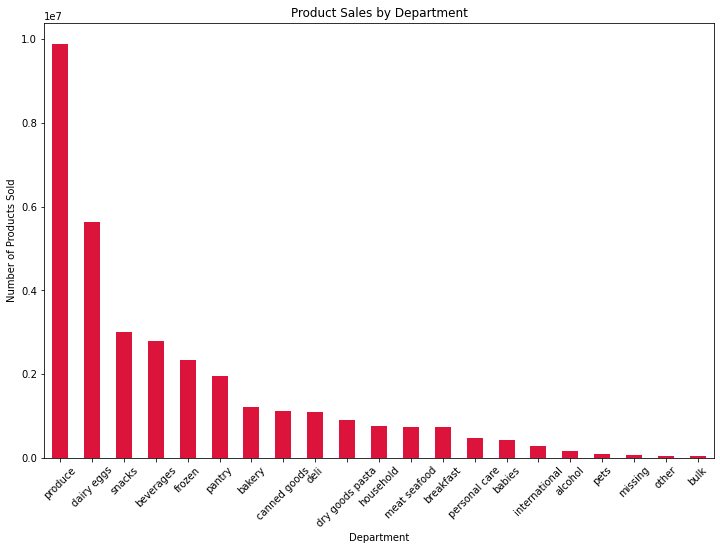

In [40]:
plt.figure(figsize=(12,8))
mergedDataF['department'].value_counts().plot(kind='bar', color='crimson')
plt.title('Product Sales by Department')
plt.xlabel('Department')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


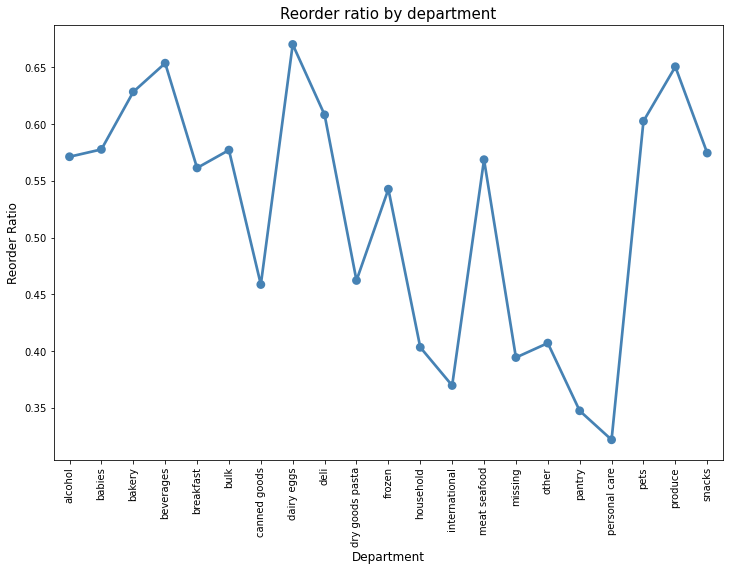

In [41]:
tempdf = mergedDataF.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(tempdf['department'].values, tempdf['reordered'].values, alpha=0.8, color='steelblue')
plt.ylabel('Reorder Ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Reorder ratio by department", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()



### Total Orders and Reorders From Most Popular Products

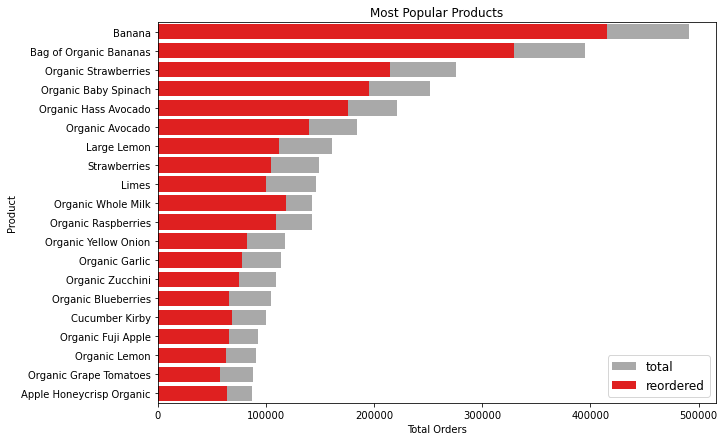

In [42]:
temp_df = mergedDataF.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.total[0:20], color='darkgray', label = "total")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color='r', label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [43]:
cnt_srs = order.groupby("eval_set")["user_id"].nunique()
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

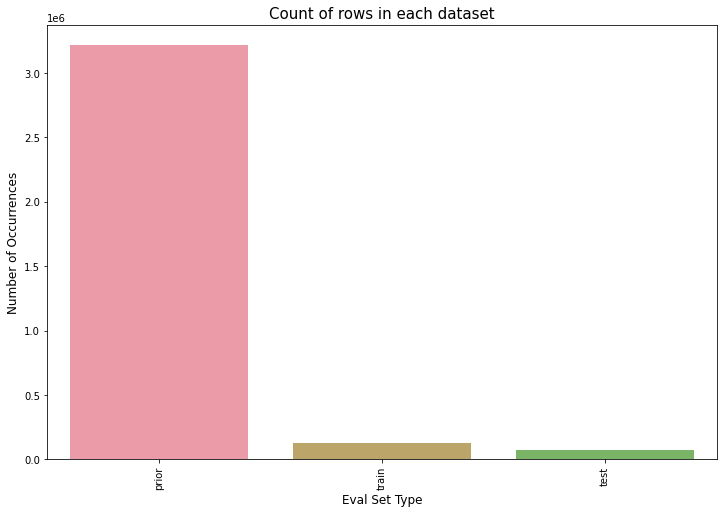

In [44]:
cnt_srs = order['eval_set'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, palette=sns.color_palette("husl"))
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval Set Type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


In [45]:
(oP_Prior.reordered.sum() / oP_Prior.shape[0])*100 #percentage of reordered products in the prior df

58.969746679221615

In [46]:
(oP_Train.reordered.sum() / oP_Train.shape[0])*100 #percentage of reordered products in the train df

59.859441275096295

In [47]:
product_frequency_count = mergedDataF['product_name'].value_counts()
product_frequency_count= product_frequency_count.reset_index()

product_frequency_count.head(5)
top_10_product_frequency_count = product_frequency_count.head(10)
top_10_product_frequency_count.columns = ['product_name', 'frequency_count']
top_10_product_frequency_count.head(10)

,product_name,frequency_count
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


Text(0.5, 1.0, 'Top 10 Products by Frequency Count')

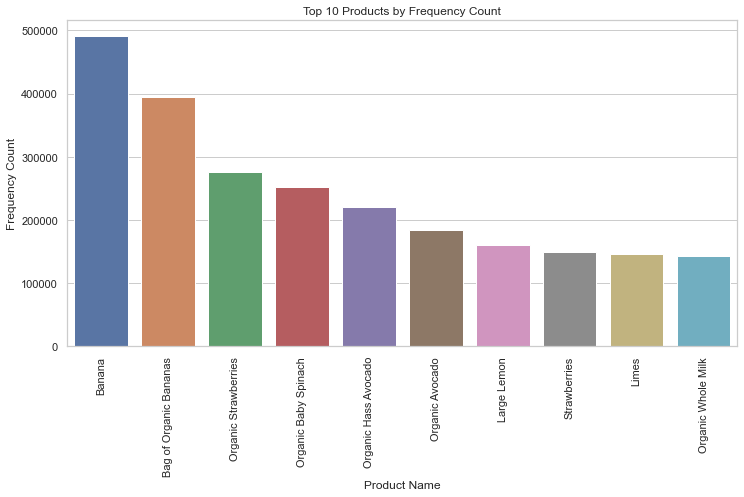

In [48]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_product_frequency_count, x='product_name', y='frequency_count')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Frequency Count')
plt.title('Top 10 Products by Frequency Count')


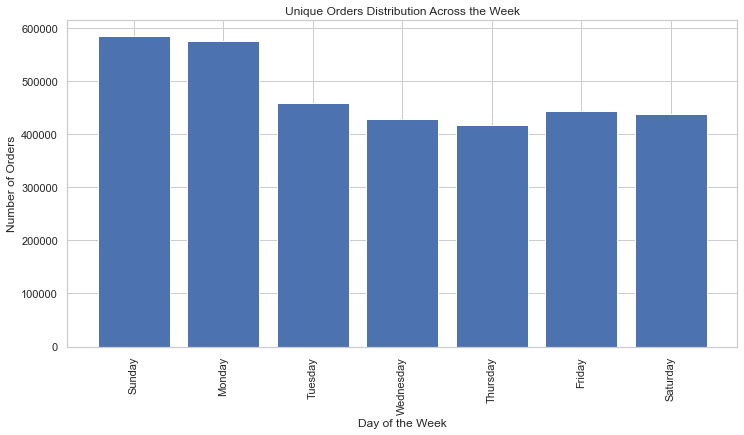

In [49]:
days = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

orders_per_day = mergedDataF.groupby('order_dow')['order_id'].nunique()


weekday_labels = []   # Convert day numbers to their corresponding names
for day in orders_per_day.index:
    weekday_labels.append(days[day])


plt.figure(figsize=(12, 6))
plt.bar(weekday_labels, orders_per_day)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Orders')
plt.xlabel('Day of the Week')
plt.title('Unique Orders Distribution Across the Week')
plt.show()

### Most Popular Products on different days

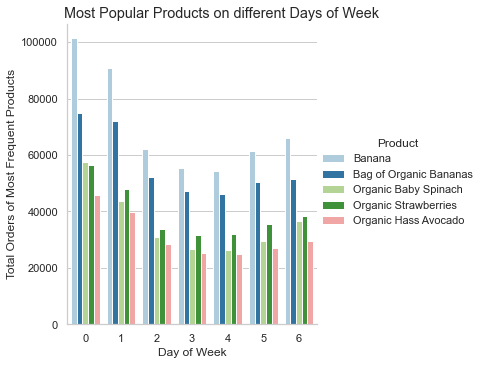

In [50]:
temp_df = mergedDataF.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)
custom_palette = sns.color_palette("Paired", len(temp_df['product_name'].unique()))
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=temp_df, kind="bar",palette=custom_palette, legend=False)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")
ax.savefig("Most Popular Products on Different Days of Week.png")

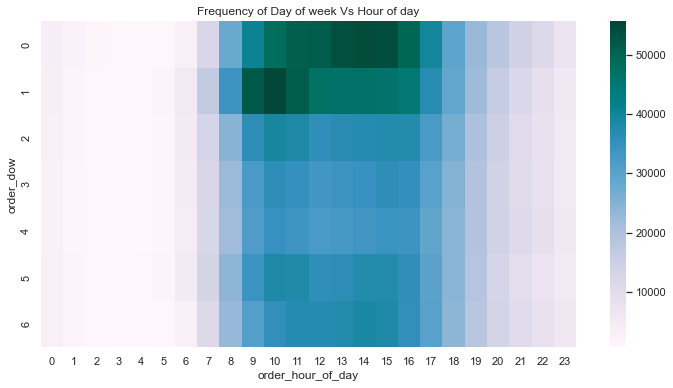

In [51]:
temp_df4 = order.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
temp_df4 = temp_df4.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(temp_df4, cmap="PuBuGn")
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['aisle', 'department','product_name']
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
column_transformer = ColumnTransformer(transformers=[('one_hot', one_hot_encoder, categorical_features)], remainder='passthrough')

## Model Development

In [53]:
x = mergedDataF[['user_total_orders', 'user_total_products', 'user_reorder_ratio', 'product_total_orders', 'product_reorder_ratio', 'add_to_cart_order', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']]
y = mergedDataF['reordered']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
y_pred_proba_lr = lr.predict_proba(x_test)[:, 1]
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print('Logistic Regression Model:')
print(f'Accuracy: {accuracy_lr:.2f}')
print(f'Precision: {precision_lr:.2f}')
print(f'Recall: {recall_lr:.2f}')
print(f'AUC-ROC: {roc_auc_lr:.2f}')


Logistic Regression Model:
Accuracy: 0.64
Precision: 0.75
Recall: 0.59
AUC-ROC: 0.71


In [56]:
dt = DecisionTreeClassifier (random_state = 42)

dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
y_pred_proba_dt = dt.predict_proba(x_test)[:, 1]
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

print('Decision Tree Model:')
print(f'Accuracy: {accuracy_dt:.2f}')
print(f'Precision: {precision_dt:.2f}')
print(f'Recall: {recall_dt:.2f}')
print(f'AUC-ROC: {roc_auc_dt:.2f}')

Decision Tree Model:
Accuracy: 0.68
Precision: 0.73
Recall: 0.73
AUC-ROC: 0.67


In [57]:
kNN = KNeighborsClassifier(n_neighbors = 5)

kNN.fit(x_train,y_train)
y_pred_kNN = kNN.predict(x_test)
y_pred_proba_kNN = kNN.predict_proba(x_test)[:, 1]
accuracy_kNN = accuracy_score(y_test,y_pred_kNN)
precision_kNN = precision_score(y_test,y_pred_kNN)
recall_kNN = recall_score(y_test,y_pred_kNN)
roc_auc_kNN = roc_auc_score(y_test,y_pred_proba_kNN)
print('KNN Model:')
print(f'Accuracy: {accuracy_kNN:.2f}')
print(f'Precision: {precision_kNN:.2f}')
print(f'Recall: {recall_kNN:.2f}')
print(f'AUC-ROC: {roc_auc_kNN:.2f}')

KNN Model:
Accuracy: 0.67
Precision: 0.70
Recall: 0.78
AUC-ROC: 0.71


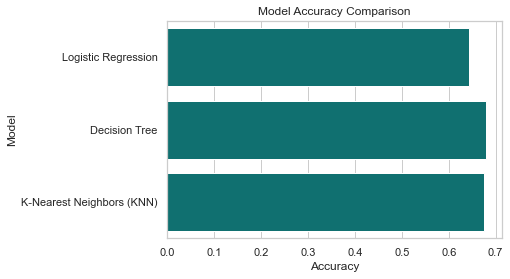

Best Model: Decision Tree ==> Highest Accuracy 


In [58]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_kNN]
models = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors (KNN)']

sns.barplot(y=models, x=accuracy_scores,color='teal')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()
print("Best Model: Decision Tree ==> Highest Accuracy ")

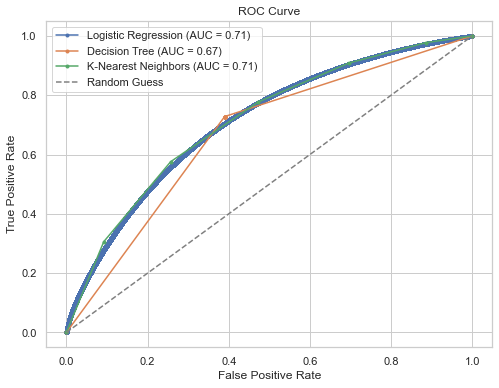

In [59]:
plt.figure(figsize=(8, 6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, marker='.', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, marker='.', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# K-Nearest Neighbors
fpr_kNN, tpr_kNN, _ = roc_curve(y_test, y_pred_proba_kNN)
roc_auc_kNN = auc(fpr_kNN, tpr_kNN)
plt.plot(fpr_kNN, tpr_kNN, marker='.', label=f'K-Nearest Neighbors (AUC = {roc_auc_kNN:.2f})')

# Random Guess
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


<Figure size 720x432 with 0 Axes>

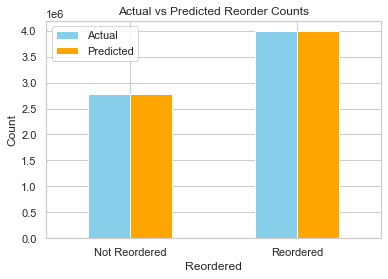

In [60]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})

# Plot the actual vs predicted counts
actual_counts = pred_df['Actual'].value_counts().sort_index()
predicted_counts = pred_df['Predicted'].value_counts().sort_index()

count_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts}).reset_index()
count_df.columns = ['Reordered', 'Actual', 'Predicted']

# Create the bar plot
plt.figure(figsize=(10, 6))
count_df.plot(kind='bar', x='Reordered', y=['Actual', 'Predicted'], color=['skyblue', 'orange'])
plt.xlabel('Reordered')
plt.ylabel('Count')
plt.title('Actual vs Predicted Reorder Counts')
plt.xticks(ticks=[0, 1], labels=['Not Reordered', 'Reordered'], rotation=0)
plt.show()